------
## Podsumowanie

In [1]:
import pandas as pd
import numpy as np

In [2]:
# generowanie przykłądowych danych
np.random.seed(42)
dane = np.random.normal(loc=70, scale=10, size=30)  # loc - średnia, scale - odchylenie

In [3]:
df = pd.DataFrame({"Wynik": dane})
print("Dane:", df.head())

Dane:        Wynik
0  74.967142
1  68.617357
2  76.476885
3  85.230299
4  67.658466


In [4]:
srednia = df['Wynik'].mean()
mediana = df['Wynik'].median()
dominanta = df["Wynik"].mode()[0]

In [5]:
print(f"Średnia:", srednia)
print(f"Mediana:", mediana)
print(f"Dominanta:", dominanta)  # wartość najcześćiej wystepujaca

Średnia: 68.11853104148962
Mediana: 67.65854834163741
Dominanta: 50.86719755342202


In [6]:
wariancja = df["Wynik"].var()
odch_stand = df['Wynik'].std()
roztep = df['Wynik'].max() - df["Wynik"].min()

In [7]:
print(f"Wariancja:", wariancja)
print(f"Odchylenie standardowe:", odch_stand)
print(f"Rozstęp:", roztep)

Wariancja: 81.00115693656517
Odchylenie standardowe: 9.000064274024112
Rozstęp: 34.924930601651894


In [8]:
print(f"Wariancja: {wariancja:.2f}")
print(f"Odchylenie standardowe: {odch_stand:.2f}")
print(f"Rozstęp: {roztep:.2f}")

Wariancja: 81.00
Odchylenie standardowe: 9.00
Rozstęp: 34.92


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Histogram wyników')

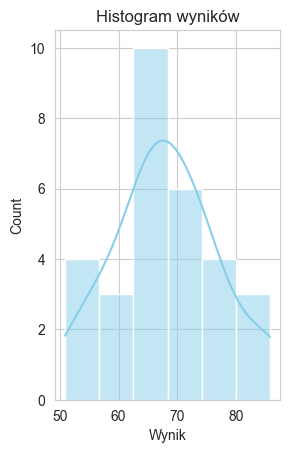

In [11]:
plt.subplot(1, 2, 1)
sns.histplot(df["Wynik"], kde=True, color="skyblue")
plt.title("Histogram wyników")

Text(0.5, 1.0, 'Wykres pudełkowy (boxplot)')

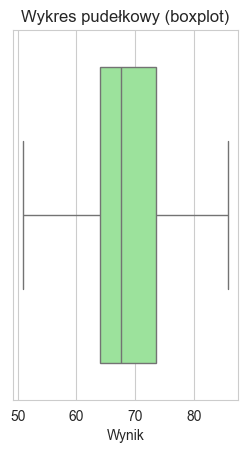

In [13]:
# wykres ramka-wąsy
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Wynik"], color="lightgreen")
plt.title("Wykres pudełkowy (boxplot)")


In [15]:
import pandas as pd
import numpy as np

np.random.seed(1)

In [17]:
normal = np.random.normal(50, 5, 100)
# z outlierami
outliers = np.append(normal, [200, 220, 240])

In [18]:
df = pd.DataFrame({
    "Bez_outlierow": normal,
    "z_outlierami": outliers[:100]  # dopasowanie wielkości
})

In [19]:
for col in df.columns:
    print(f"---{col}---")
    print(f"Średnia: {df[col].mean()}")
    print(f"Mediana: {df[col].median()}")
    print(f"Dominanta: {df[col].mode()[0]}")

---Bez_outlierow---
Średnia: 50.763973888101
Mediana: 51.18307912854118
Dominanta: 37.82581117946431
---z_outlierami---
Średnia: 50.763973888101
Mediana: 51.18307912854118
Dominanta: 37.82581117946431


In [21]:
print(df["Bez_outlierow"].mode())

0     37.825811
1     40.518195
2     40.710091
3     41.862808
4     41.921138
        ...    
95    59.523294
96    59.835509
97    60.934898
98    60.953499
99    62.641629
Name: Bez_outlierow, Length: 100, dtype: float64


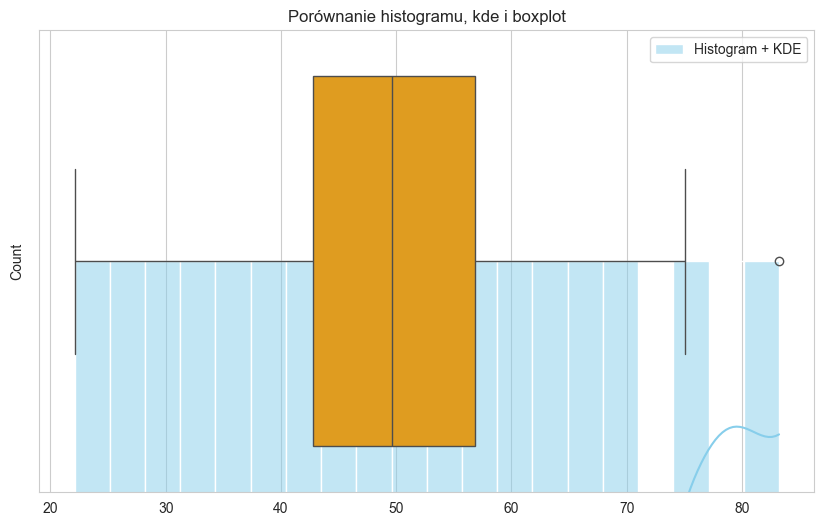

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

data = np.random.normal(50, 10, 200)

plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color="skyblue", bins=20, label="Histogram + KDE")
sns.boxplot(x=data, color="orange")
plt.legend()
plt.title("Porównanie histogramu, kde i boxplot")
plt.show()

In [28]:
groupA = np.random.normal(70, 5, 100)
groupB = np.random.normal(65, 10, 100)

In [31]:
df = pd.DataFrame({"Grupa": ["A"] * 100 + ["B"] * 100, "Wynik": np.concatenate([groupA, groupB])})

C:\Users\CSComarch\AppData\Local\Temp\ipykernel_13844\1559278141.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grupa", y="Wynik", data=df, palette="pastel")


Text(0.5, 1.0, 'Porównanie wyników dwóch grup')

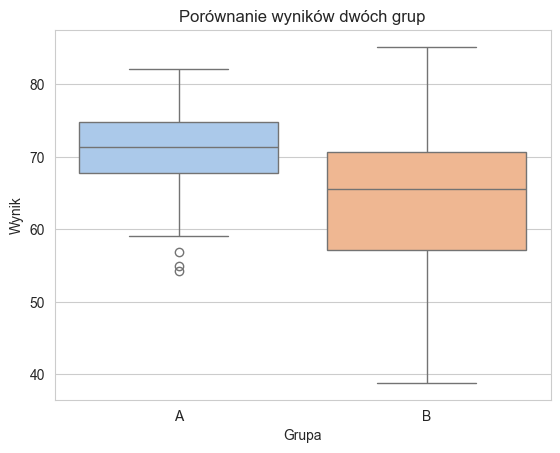

In [35]:
sns.boxplot(x="Grupa", y="Wynik", data=df, palette="pastel")
plt.title("Porównanie wyników dwóch grup")

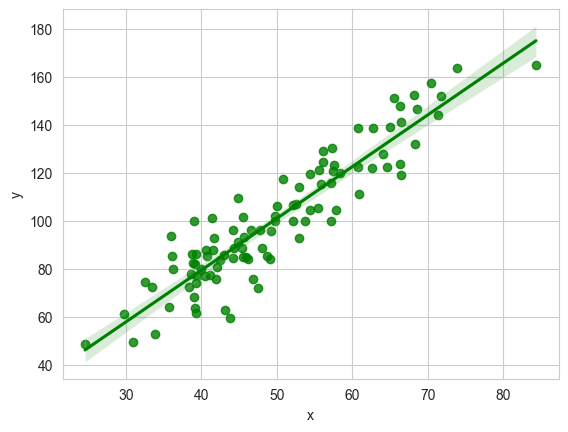

In [36]:
x = np.random.normal(50, 10, 100)
y = 2 * x + np.random.normal(0, 10, 100)

df = pd.DataFrame({"x": x, "y": y})

sns.regplot(x="x", y="y", data=df, color="green")
plt.show()

In [37]:
import numpy as np
import pandas as pd

np.random.seed(0)

In [38]:
x = np.random.normal(50, 8, 100)
x_out = np.concatenate([x, [200, 220]])

In [39]:
s = pd.Series(x)

In [40]:
s.head()

0    64.112419
1    53.201258
2    57.829904
3    67.927146
4    64.940464
dtype: float64

In [41]:
s_out = pd.Series(x_out)

In [43]:
print("Bez wartości odstających: mean:", s.mean(), " median:", s.median())
print("Z wartościami odstającymi: mean:", s_out.mean(), " median:", s_out.median())

Bez wartości odstających: mean: 50.47846412427587  median: 50.75276895550398
Z wartościami odstającymi: mean: 53.606337376741045  median: 50.99434843678579


In [44]:
q1, q3 = s.quantile([0.25, 0.75])
iqr = q3 - q1
mad = (s - s.median()).abs().median()
print("std:", s.std(ddof=1), " IQR:", iqr, "MAD:", mad)

std: 8.103678154148014  IQR: 11.047472280996885 MAD: 5.425360082385303


In [45]:
q1o, q3o = s_out.quantile([0.25, 0.75])
iqr_o = q3o - q1o
mad_o = (s_out - s_out.median()).abs().median()
print("std:", s_out.std(ddof=1), " IQR:", iqr_o, "MAD:", mad_o)

std: 23.672184640021815  IQR: 11.150649476900057 MAD: 5.773143454495688


# SciPy
algebra, interpolacja, statystyka

In [46]:
!pip install scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ----------------- ---------------------- 17.0/38.5 MB 96.5 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.5 MB 141.2 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 82.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from scipy.stats import skew, kurtosis

In [50]:
for name, data in [("normalny", x), ("z_outlierami", x_out)]:
    print(name, " skew:", round(skew(data), 3), " kurt:", round(kurtosis(data), 3))


normalny  skew: 0.005  kurt: -0.378
z_outlierami  skew: 5.761  kurt: 36.082


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize, stats, spatial, fft, signal, linalg, ndimage, interpolate, cluster

### Obliczenie calki oznaczonej

In [54]:
res, err = integrate.quad(lambda x: x ** 2, 0, 2)
print("Wynik całkowania x^2 ", res, "Bład:", err)

Wynik całkowania x^2  2.666666666666667 Bład: 2.960594732333751e-14


### Znajdowanie minimum funkcji kwadratowej f(x) = (x-3)^2

In [55]:
res = optimize.minimize(lambda x: (x - 3) ** 2, x0=0)
print("Minimum:", res)


Minimum:   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.5388963550532293e-16
        x: [ 3.000e+00]
      nit: 2
      jac: [-1.697e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


In [56]:
print(res.x)

[2.99999998]


### Test Shapiro - Wilka

In [58]:
data = stats.norm.rvs(size=500)

In [60]:
stat, p = stats.shapiro(data)

In [61]:
print("Shapiro-Wilk", stat, "p-value", p)

Shapiro-Wilk 0.9979246699038464 p-value 0.8061621677584668


blikie 1, p > 0.05 - mozna uznac, że to rozkład normalny

Text(0, 0.5, 'Częstość')

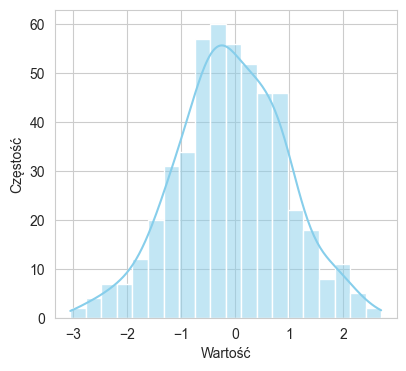

In [62]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(data, bins=20, kde=True, color="skyblue")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

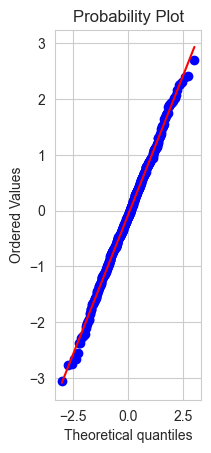

In [64]:
plt.subplot(1, 3, 3)
stats.probplot(data, dist="norm", plot=plt)
plt.show()

## Odległość euklidesowa

In [65]:
from scipy.spatial.distance import euclidean

In [66]:
print("Odległość:", euclidean([1, 2], [4, 6]))
print(type(euclidean([1, 2], [4, 6])))

Odległość: 5.0
<class 'numpy.float64'>
